In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report



In [2]:
df = pd.read_csv('mental_health_journal.csv')
df.head()
#pd.options.display.max_rows

,Journal,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,family,food,friends,god,health,love,recreation,school,sleep,work
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [3]:
df.tail()

,Journal,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,family,food,friends,god,health,love,recreation,school,sleep,work
1468,"A workout, dining with friends makes for a hea...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1469,"My connection to God, through prayer brings me...",False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1470,"I got a skull pan for halloween, and my husban...",False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1471,I spoke over the phone with my brother that li...,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1472,"I had a lengthy but mostly fun, frivolous conv...",False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [4]:
df.isnull().sum()


Journal           0
afraid            0
 angry            0
anxious           0
 ashamed          0
awkward           0
 bored            0
calm              0
 confused         0
 disgusted        0
 excited          0
 frustrated       0
 happy            0
 jealous          0
 nostalgic        0
 proud            0
 sad              0
 satisfied        0
 surprised        0
  exercise        0
  family          0
  food            0
  friends         0
  god             0
  health          0
  love            0
  recreation      0
  school          0
  sleep           0
  work            0
dtype: int64

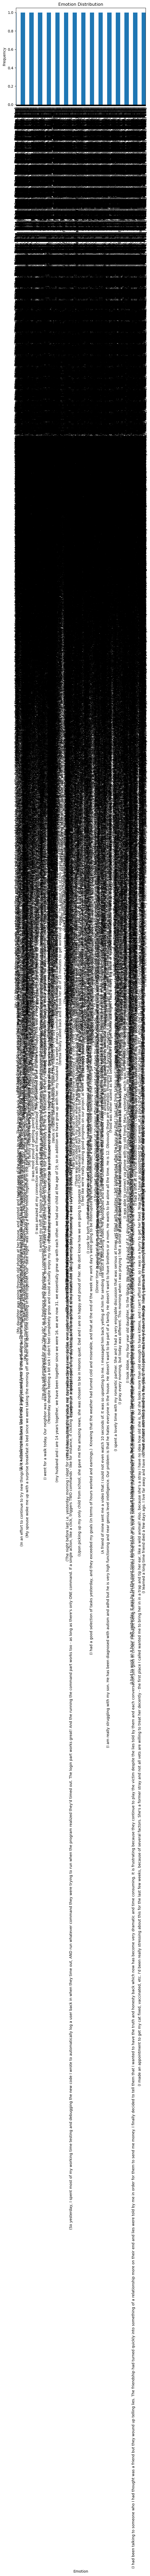

In [5]:
emotions = df.value_counts()
emotions.plot(kind='bar', title='Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


In [6]:
import re
from nltk.corpus import stopwords

# Download NLTK stopwords if you haven't
import nltk
nltk.download('stopwords')

def clean_text(text):
    # Remove special characters, digits, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['Journal'].apply(clean_text)  # Adjust text column name


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Step 1: Clean up column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Step 2: Define your features and labels again
X = df['cleaned_text']

# Get emotion columns (all except 'Journal' and 'cleaned_text')
emotion_cols = [col for col in df.columns if col not in ['Journal', 'cleaned_text', 'text']]
y = df[emotion_cols]



In [8]:
print(df.columns)

Index(['Journal', 'afraid', 'angry', 'anxious', 'ashamed', 'awkward', 'bored',
       'calm', 'confused', 'disgusted', 'excited', 'frustrated', 'happy',
       'jealous', 'nostalgic', 'proud', 'sad', 'satisfied', 'surprised',
       'exercise', 'family', 'food', 'friends', 'god', 'health', 'love',
       'recreation', 'school', 'sleep', 'work', 'cleaned_text'],
      dtype='object')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
print(type(y_train), y_train.shape)


<class 'pandas.core.frame.DataFrame'> (1178, 29)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train_tfidf, y_train)  # y_train should be a DataFrame (multi-label)


OneVsRestClassifier(estimator=LogisticRegression())

In [13]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=emotion_cols))


              precision    recall  f1-score   support

      afraid       0.00      0.00      0.00         2
       angry       0.00      0.00      0.00         5
     anxious       0.00      0.00      0.00        23
     ashamed       0.00      0.00      0.00         4
     awkward       0.00      0.00      0.00         4
       bored       0.00      0.00      0.00        15
        calm       1.00      0.05      0.09        87
    confused       0.00      0.00      0.00         7
   disgusted       0.00      0.00      0.00         3
     excited       0.00      0.00      0.00        46
  frustrated       0.00      0.00      0.00        28
       happy       0.72      0.61      0.66       153
     jealous       0.00      0.00      0.00         0
   nostalgic       0.00      0.00      0.00         6
       proud       0.86      0.18      0.30        66
         sad       0.00      0.00      0.00         6
   satisfied       0.68      0.24      0.36       124
   surprised       0.00    

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sk

now,model is trained, predictions are made, and evaluation is done.
 full cycle of a machine learning project:
Data → Preprocessing → Vectorizing → Modeling → Predicting → Evaluating.

next step, saving the ml model safely with joblib
model + vectorizer

In [14]:
import joblib


In [15]:
# Save the trained model
joblib.dump(model, 'emotion_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [16]:
# Load model
model = joblib.load('emotion_classifier_model.pkl')

# Load vectorizer
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')


In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import joblib

# Load your CSV
df = pd.read_csv('mental_health_journal.csv')

# Extract label columns (skip the text column)
label_columns = df.columns[1:]  # Assuming first column is 'text'

# Create MultiLabelBinarizer and fit it
mlb = MultiLabelBinarizer(classes=label_columns)
mlb.fit([label_columns])  # Fit expects iterable of lists

# Save mlb for later use
joblib.dump(mlb, "mlb.pkl")


['mlb.pkl']